# WeatherPy
----

## Analysis:

* The temperature of a city is strongly negatively correlated with the absolute value of its latitude.
* Cloudiness, Humidity, and Windspeed have no correlation with latitude, although low humidity was rarely found near equator and poles.
* This code strongly weighted information from *coastal* cities over inland cities, introducing possible bias.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import random
from scipy.stats import linregress
from datetime import date


# Import API key
from api_keys import weather_api_key



In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
cities = []
count = 0
while count < 500 :
    lat_lngs = []

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
    lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

    # Print the city count to confirm sufficient count
    
    count = len(cities)
    
count

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Building the url components that will be statis throughout the search
base_url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "units": "imperial",
    "appid": weather_api_key,
}

In [5]:
def convert_temp (temp, scale='C', to='F'):
    '''
    Takes a temperature and converts it to a different scale
    temp must be numeric
    valid values form the starting scale and to scale are 'C': Celsius, 'F': Farenheit, and 'K': Kelvin
    '''
    scales = ['C','F','K']
    #print(scale.upper(),'\n',to,'\n',scales)
    if not ((scale.upper() in scales) and (to.upper() in scales)):
        return ValueError("valid values form the starting scale and to scale are 'C': Celsius, 'F': Farenheit, and 'K': Kelvin")
    
    if scale == 'C' and to == 'F':
        return 32.0 + ((9.0 / 5) * temp)
    
    if scale == 'F' and to == 'C':
        return (-32.0 + temp) * (5.0 / 9)
    
    if scale == 'K' and to == 'C':
        return temp - 273.15
    
    if scale == 'C' and to == 'K':
        return temp + 273.15
    
    if scale == 'K' and to == 'F':
        return 32.0 + ((9.0 / 5) * (temp - 273.15))
    
    if scale == 'F' and to == 'K':
        return ((-32.0 + temp) * (5.0 / 9)) + 273.15
    
    
#convert_temp(0)

#Note: this function is not used

In [6]:
#figuring out which data to extract for each city
params["q"] = np.random.choice(cities)

response = requests.get(base_url, params=params)

'''
{'coord': {'lon': -117.16, 'lat': 32.72},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 16.93,
  'feels_like': 17.09,
  'temp_min': 15,
  'temp_max': 20,
  'pressure': 1013,
  'humidity': 77},
 'visibility': 14484,
 'wind': {'speed': 1.05, 'deg': 257},
 'clouds': {'all': 90},
 'dt': 1594289893,
 'sys': {'type': 1,
  'id': 5771,
  'country': 'US',
  'sunrise': 1594298899,
  'sunset': 1594349950},
 'timezone': -25200,
 'id': 5391811,
 'name': 'San Diego',
 'cod': 200}
'''

'''
City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64
'''

response.json()

{'cod': '404', 'message': 'city not found'}

In [7]:
data = []
'''
here, I query open weather maps for each city, extracting the following:
name, latitude, longitude, daily high, humidity, cloud coverage %, wind speed
'''
print('Beginning Data Retrieval')     
print('-----------------------------')
j = 1
for i in range(len(cities)):
    params['q'] = cities[i]
    try:
        response = requests.get(base_url, params=params)
        r = response.json()
        city = r['name']
        lat = r['coord']['lat']
        lng = r['coord']['lon']
        max_temp = r['main']['temp_max']
        humid = r['main']['humidity']
        cloud = r['clouds']['all']
        wind = r['wind']['speed']
        country = r['sys']['country']
        today = date.today()

        r_data = [city,lat,lng,max_temp,humid,cloud,wind,country,today]
        
        data.append(r_data)
        print(f'Processing Record {i%50+1} of Set {j} | {cities[i]}')
        
    except (KeyError, IndexError):
        print('City not found. Skipping...')
        
    if (i + 1) % 50 == 0:
        j += 1
        time.sleep(10)
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | harrismith
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | kenora
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | necochea
Processing Record 14 of Set 1 | tiznit
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | apollonia
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | prevalje
City not found. Skipping...
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | carnarvon
Processing Record 24 of Set 1 | geral

City not found. Skipping...
Processing Record 6 of Set 5 | west wendover
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of Set 5 | baker city
Processing Record 9 of Set 5 | santa rosa
Processing Record 10 of Set 5 | inta
Processing Record 11 of Set 5 | vaitape
City not found. Skipping...
Processing Record 13 of Set 5 | talara
City not found. Skipping...
Processing Record 15 of Set 5 | lagoa
Processing Record 16 of Set 5 | bismarck
Processing Record 17 of Set 5 | isangel
Processing Record 18 of Set 5 | hobyo
Processing Record 19 of Set 5 | vardo
Processing Record 20 of Set 5 | talnakh
Processing Record 21 of Set 5 | pisco
Processing Record 22 of Set 5 | broome
Processing Record 23 of Set 5 | port moresby
Processing Record 24 of Set 5 | kungurtug
Processing Record 25 of Set 5 | vondrozo
Processing Record 26 of Set 5 | warrington
Processing Record 27 of Set 5 | stavern
Processing Record 28 of Set 5 | dingle
Processing Record 29 of Set 5 | madinat sittah uktubar
Processing R

Processing Record 11 of Set 9 | nantucket
City not found. Skipping...
Processing Record 13 of Set 9 | solms
Processing Record 14 of Set 9 | luebo
City not found. Skipping...
Processing Record 16 of Set 9 | maragogi
Processing Record 17 of Set 9 | leczna
Processing Record 18 of Set 9 | coxim
Processing Record 19 of Set 9 | maarianhamina
Processing Record 20 of Set 9 | ixtapa
Processing Record 21 of Set 9 | manggar
Processing Record 22 of Set 9 | lyubytino
City not found. Skipping...
Processing Record 24 of Set 9 | marawi
Processing Record 25 of Set 9 | nalut
Processing Record 26 of Set 9 | reserva
Processing Record 27 of Set 9 | tabuny
Processing Record 28 of Set 9 | kamenka
Processing Record 29 of Set 9 | gat
Processing Record 30 of Set 9 | belyy yar
Processing Record 31 of Set 9 | moose factory
Processing Record 32 of Set 9 | faya
Processing Record 33 of Set 9 | hadano
Processing Record 34 of Set 9 | kemi
Processing Record 35 of Set 9 | nova olimpia
Processing Record 36 of Set 9 | man

In [8]:
data[0:5]

[['Nikolskoye',
  59.7,
  30.79,
  60.8,
  87,
  90,
  4.47,
  'RU',
  datetime.date(2020, 7, 10)],
 ['Tiksi',
  71.69,
  128.87,
  44.71,
  81,
  59,
  8.97,
  'RU',
  datetime.date(2020, 7, 10)],
 ['Rikitea',
  -23.12,
  -134.97,
  68,
  64,
  64,
  16.46,
  'PF',
  datetime.date(2020, 7, 10)],
 ['Punta Arenas',
  -53.15,
  -70.92,
  26.6,
  92,
  75,
  6.93,
  'CL',
  datetime.date(2020, 7, 10)],
 ['Upernavik',
  72.79,
  -56.15,
  42.35,
  86,
  94,
  7.65,
  'GL',
  datetime.date(2020, 7, 10)]]

In [9]:
for i in range(len(data)):
    data[i][8] = data[i][8].isoformat()

In [10]:
'''
City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64
'''
weather_df = pd.DataFrame(data, columns=['City Name', 'Latitude', 'Longitude', 'Daily High', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

In [11]:
weather_df.head()

,City Name,Latitude,Longitude,Daily High,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.70,30.79,60.80,87,90,4.47,RU,2020-07-10
1,Tiksi,71.69,128.87,44.71,81,59,8.97,RU,2020-07-10
2,Rikitea,-23.12,-134.97,68.00,64,64,16.46,PF,2020-07-10
3,Punta Arenas,-53.15,-70.92,26.60,92,75,6.93,CL,2020-07-10
4,Upernavik,72.79,-56.15,42.35,86,94,7.65,GL,2020-07-10


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_df.to_csv(output_data_file, index=False)

In [13]:
# weather_df = pd.read_csv(output_data_file)
# weather_df.head()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
sweaty_df = weather_df.loc[weather_df['Humidity'] > 100]
sweaty_df.index

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(sweaty_df.index)
clean_city_data.head()

,City Name,Latitude,Longitude,Daily High,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.70,30.79,60.80,87,90,4.47,RU,2020-07-10
1,Tiksi,71.69,128.87,44.71,81,59,8.97,RU,2020-07-10
2,Rikitea,-23.12,-134.97,68.00,64,64,16.46,PF,2020-07-10
3,Punta Arenas,-53.15,-70.92,26.60,92,75,6.93,CL,2020-07-10
4,Upernavik,72.79,-56.15,42.35,86,94,7.65,GL,2020-07-10


In [16]:
# Extract relevant fields from the data frame
##Which fields?

# Export the City_Data into a csv
## a second csv?
output_data_file = 'output_data/clean_cities.csv'
clean_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [17]:
clean_city_data.head()

,City Name,Latitude,Longitude,Daily High,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.70,30.79,60.80,87,90,4.47,RU,2020-07-10
1,Tiksi,71.69,128.87,44.71,81,59,8.97,RU,2020-07-10
2,Rikitea,-23.12,-134.97,68.00,64,64,16.46,PF,2020-07-10
3,Punta Arenas,-53.15,-70.92,26.60,92,75,6.93,CL,2020-07-10
4,Upernavik,72.79,-56.15,42.35,86,94,7.65,GL,2020-07-10


## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Daily Temperature (F)')

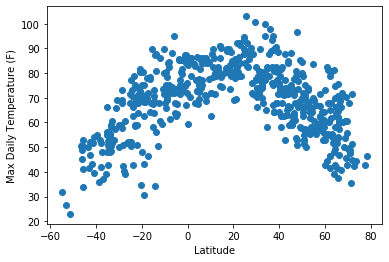

In [18]:
#linRegPlot(clean_city_data,clean_city_data,'','')
plt.scatter(clean_city_data['Latitude'], clean_city_data['Daily High'])
plt.xlabel('Latitude')
plt.ylabel('Max Daily Temperature (F)')

* As we can see, the temperatures of the earth are highest around the equator and lowest near the poles. There appears to be a relationship, but it's not linear

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

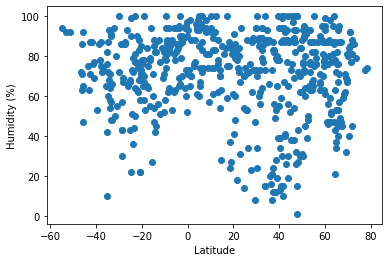

In [19]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

* The humidity appears to be the Lowest near the equator and the poles, but there is no clear linear relationship between latitude and humidity

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

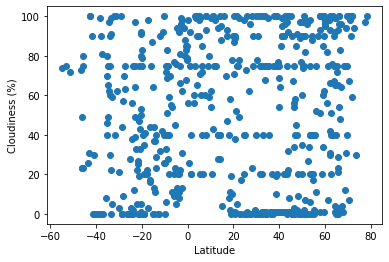

In [20]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

* There appears to be no linear correlation between latitude and cloudiness, however the data appears to be 'snapped' to 10% increments because it is based on human judgement

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

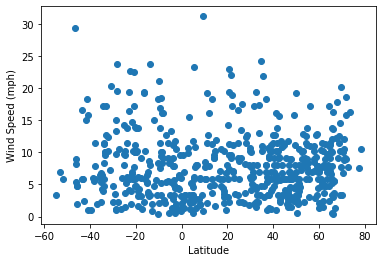

In [21]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

* There appears to be no clear linear correlation between latitude and windspeed, but the highest wind speeds are near the equator

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots
def linRegPlot(x_values, y_values, x_label = "", y_label = ""):
    '''
    Takes the x values and y values for a scatter plot,
    runs a linear regression comparing the two values,
    and then displays a scatter plot with the regression line
    '''
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,'r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print('The r-squared-value of the relationship is', round(rvalue**2,4))

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data.loc[clean_city_data['Latitude'] >= 0]
southern_df = clean_city_data.loc[clean_city_data['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

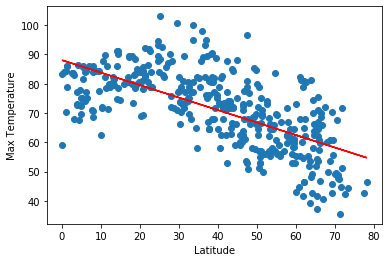

The r-squared-value of the relationship is 0.4313


In [24]:
linRegPlot(northern_df['Latitude'], northern_df['Daily High'],'Latitude','Max Temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

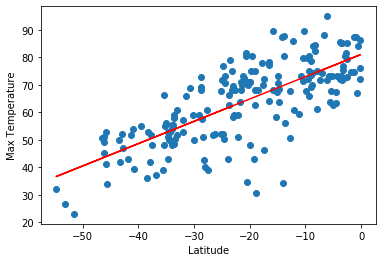

The r-squared-value of the relationship is 0.543


In [25]:
linRegPlot(southern_df['Latitude'], southern_df['Daily High'],'Latitude','Max Temperature')

* There is a strong linear correlation between the latitude and the daily high on each side of the equator
* It is strongly negative in the northern hemisphere, and strongly positive in the southern hemisphere.
* This matches our earlier observation that temperature goes down as we go away from the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

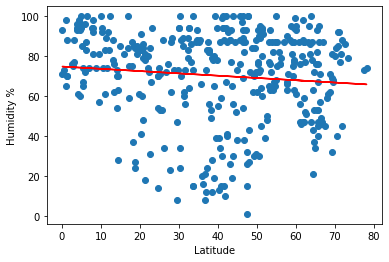

The r-squared-value of the relationship is 0.0101


In [26]:
linRegPlot(northern_df['Latitude'], northern_df['Humidity'],'Latitude','Humidity %')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

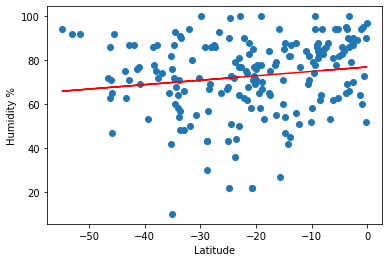

The r-squared-value of the relationship is 0.0237


In [27]:
linRegPlot(southern_df['Latitude'], southern_df['Humidity'],'Latitude','Humidity %')

* The correlation betweeen latitude and humidity is extremely weak
* It would be helpful to analyze the data to see if the lack of low humidity at the poles and equator is significant

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

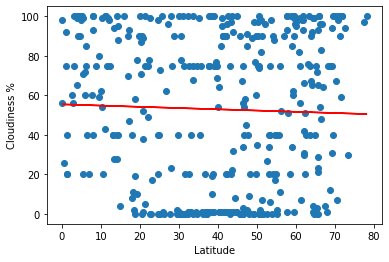

The r-squared-value of the relationship is 0.0011


In [28]:
linRegPlot(northern_df['Latitude'], northern_df['Cloudiness'],'Latitude','Cloudiness %')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

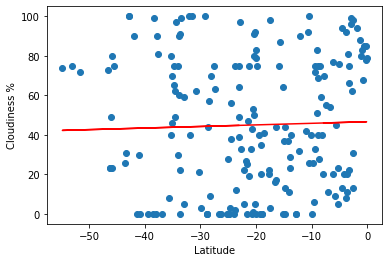

The r-squared-value of the relationship is 0.001


In [29]:
linRegPlot(southern_df['Latitude'], southern_df['Cloudiness'],'Latitude','Cloudiness %')

* There regression shows that there is no relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

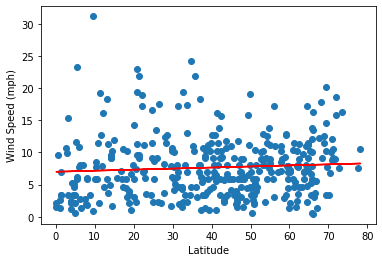

The r-squared-value of the relationship is 0.0049


In [30]:
linRegPlot(northern_df['Latitude'], northern_df['Wind Speed'],'Latitude','Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

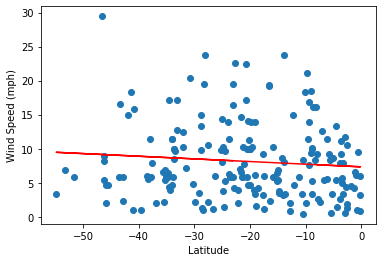

The r-squared-value of the relationship is 0.0086


In [31]:
linRegPlot(southern_df['Latitude'], southern_df['Wind Speed'],'Latitude','Wind Speed (mph)')

* There regression shows that there is no relationship between latitude and wind speed.